<a href="https://colab.research.google.com/github/ReshmaAjil/Customer-Purchase-Prediction-with-KNN-model/blob/main/Knn_customer_Purchase_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#generating a realistic datset


import pandas as pd
import numpy as np

np.random.seed(42)

n_samples = 200

age = np.random.randint(18, 60, size=n_samples)
monthly_spend = np.random.randint(3000, 20000, size=n_samples)

# Purchase logic with noise (realistic behavior)
purchased = (
    (monthly_spend > 9000) &
    (age > 25) &
    (np.random.rand(n_samples) > 0.3)
).astype(int)

df = pd.DataFrame({
    'age': age,
    'monthly_spend': monthly_spend,
    'purchased': purchased
})

df.head()

,age,monthly_spend,purchased
0,56,7389,0
1,46,5327,0
2,32,11004,1
3,25,10777,0
4,38,3197,0


In [ ]:
#split feature and target variable
X=df.drop('purchased',axis=1)
y=df['purchased']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:

k_values=[3,5,7]
for k in k_values:
  knn_model=KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,y_train)
  #Prediction
  y_pred=knn_model.predict(X_test)
  print("For value of k ={k}")
  print("Accuracy Score ",accuracy_score(y_test,y_pred))
  print("Classification Report",classification_report(y_test,y_pred))
  print("Confusion Matrix ",confusion_matrix(y_test,y_pred))

For value of k ={k}
Accuracy Score  0.8333333333333334
Classification Report               precision    recall  f1-score   support

           0       0.80      0.97      0.88        36
           1       0.94      0.62      0.75        24

    accuracy                           0.83        60
   macro avg       0.87      0.80      0.81        60
weighted avg       0.85      0.83      0.82        60

Confusion Matrix  [[35  1]
 [ 9 15]]
For value of k ={k}
Accuracy Score  0.9
Classification Report               precision    recall  f1-score   support

           0       0.86      1.00      0.92        36
           1       1.00      0.75      0.86        24

    accuracy                           0.90        60
   macro avg       0.93      0.88      0.89        60
weighted avg       0.91      0.90      0.90        60

Confusion Matrix  [[36  0]
 [ 6 18]]
For value of k ={k}
Accuracy Score  0.8833333333333333
Classification Report               precision    recall  f1-score   support

 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
mean_scores=[]
cv_scores = cross_val_score(
    knn,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy'
)
mean_scores.append(cv_scores.mean)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.78571429 0.78571429 0.89285714 0.71428571 0.71428571]
Mean CV accuracy: 0.7785714285714287


In [ ]:
k_values=range(1,21)
mean_scores=[]
for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(
    knn,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy'
    )
    #print("cv_scores.mean() : ",cv_scores.mean())
    mean_scores.append(cv_scores.mean())
    #print("mean_scores:",mean_scores)
    print(f"Cross-validation scores: for {k}", cv_scores)
    print(f"Mean CV accuracy for {k}: ", cv_scores.mean())

Cross-validation scores: for 1 [0.75       0.82142857 0.85714286 0.67857143 0.71428571]
Mean CV accuracy for 1:  0.7642857142857142
Cross-validation scores: for 2 [0.75       0.78571429 0.85714286 0.75       0.67857143]
Mean CV accuracy for 2:  0.7642857142857142
Cross-validation scores: for 3 [0.82142857 0.82142857 0.92857143 0.71428571 0.78571429]
Mean CV accuracy for 3:  0.8142857142857143
Cross-validation scores: for 4 [0.78571429 0.75       0.85714286 0.67857143 0.64285714]
Mean CV accuracy for 4:  0.7428571428571428
Cross-validation scores: for 5 [0.78571429 0.78571429 0.89285714 0.71428571 0.71428571]
Mean CV accuracy for 5:  0.7785714285714287
Cross-validation scores: for 6 [0.75       0.78571429 0.78571429 0.75       0.67857143]
Mean CV accuracy for 6:  0.75
Cross-validation scores: for 7 [0.71428571 0.75       0.75       0.67857143 0.64285714]
Mean CV accuracy for 7:  0.7071428571428572
Cross-validation scores: for 8 [0.75       0.75       0.71428571 0.64285714 0.67857143]
Me

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=3)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)
#print("For value of k ={k}")
print("Accuracy Score ",accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))
print("Confusion Matrix ",confusion_matrix(y_test,y_pred))

Accuracy Score  0.8333333333333334
Classification Report               precision    recall  f1-score   support

           0       0.80      0.97      0.88        36
           1       0.94      0.62      0.75        24

    accuracy                           0.83        60
   macro avg       0.87      0.80      0.81        60
weighted avg       0.85      0.83      0.82        60

Confusion Matrix  [[35  1]
 [ 9 15]]


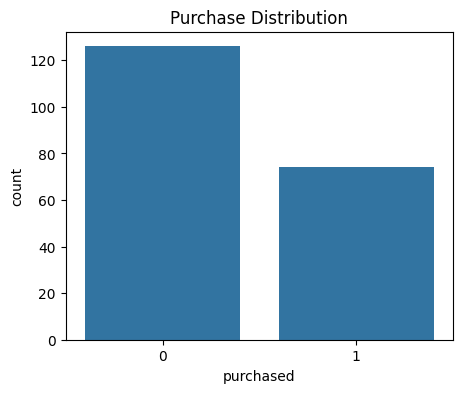

In [ ]:
#Target Variable Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='purchased', data=df)
plt.title("Purchase Distribution")
plt.show()

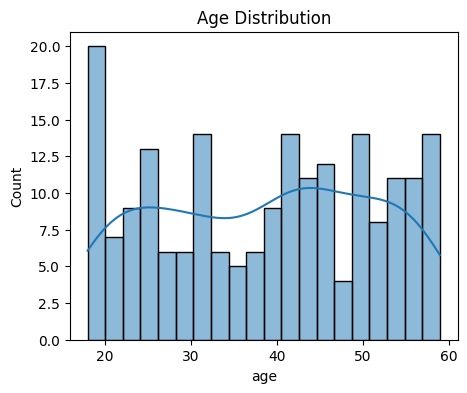

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

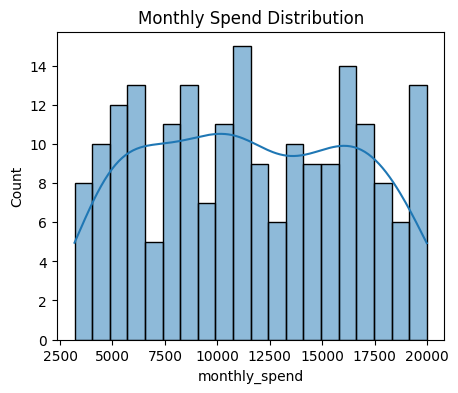

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df['monthly_spend'], bins=20, kde=True)
plt.title("Monthly Spend Distribution")
plt.show()

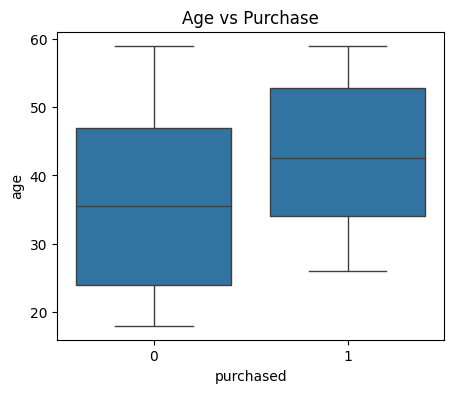

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='purchased', y='age', data=df)
plt.title("Age vs Purchase")
plt.show()

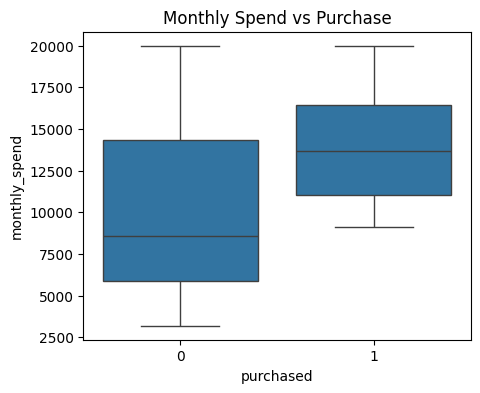

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='purchased', y='monthly_spend', data=df)
plt.title("Monthly Spend vs Purchase")
plt.show()

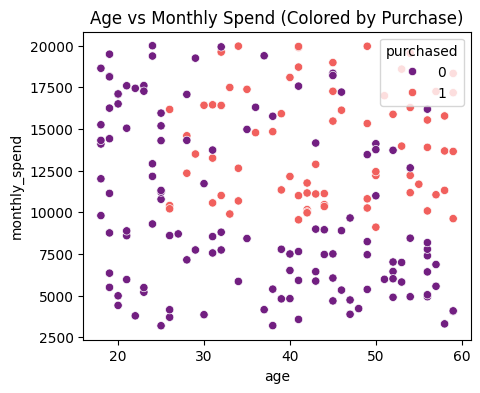

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(
    x='age',
    y='monthly_spend',
    hue='purchased',
    data=df,
    palette='magma'
)
plt.title("Age vs Monthly Spend (Colored by Purchase)")
plt.show()

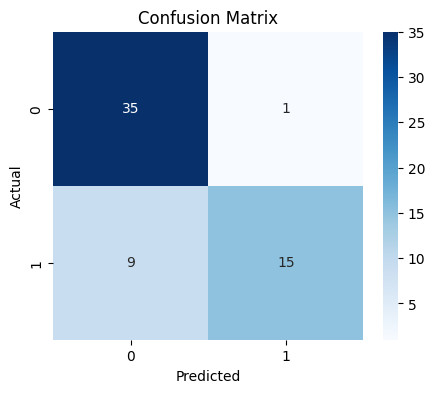

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

[0.7642857142857142, 0.7642857142857142, 0.8142857142857143, 0.7428571428571428, 0.7785714285714287, 0.75, 0.7071428571428572, 0.7071428571428571, 0.7357142857142857, 0.7214285714285713, 0.7571428571428571, 0.7357142857142857, 0.7785714285714285, 0.75, 0.7571428571428572, 0.75, 0.7714285714285714, 0.7642857142857142, 0.7785714285714285, 0.7571428571428571]


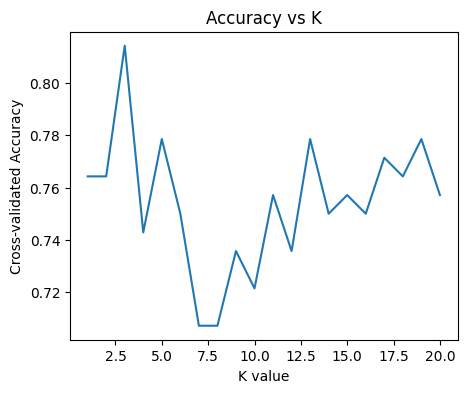

In [ ]:
import numpy as np
clean_values = np.array(mean_scores).tolist()
print(clean_values)
plt.figure(figsize=(5,4))
#print(mean_scores)
plt.plot(range(1,21), mean_scores)
plt.xlabel("K value")
plt.ylabel("Cross-validated Accuracy")
plt.title("Accuracy vs K")
plt.show()